# Importing basic packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data


We have taken the datset from https://www.unb.ca/cic/datasets/url-2016.html. Filtered Phsing and Benign data from it and formed and new dataset named Phising_Benign_dataset.

In [2]:
data = pd.read_csv('/content/Phising_Benign_dataset.csv')
data.head()

Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0            0                   2                12                5.5   
1            0                   3                12                5.0   
2            2                   2                11                4.0   
3            0                   2                 7                4.5   
4           19                   2                10                6.0   

   longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
0                   8         4.083334    2              15            7   
1                  10         3.583333    3              12            8   
2                   5         4.750000    2              16           11   
3                   7         5.714286    2              15           10   
4                   9         2.250000    2               9            5   

   ldl_url  ...  SymbolCount_FileName  SymbolCount_Extension  \
0        0  ...                    -1                     -1   
1        2  ...                     1                      0   
2        0  ...                     2                      0   
3        0  ...                     0                      0   
4        0  ...                     5                      4   

   SymbolCount_Afterpath  Entropy_URL  Entropy_Domain  Entropy_DirectoryName  \
0                     -1     0.676804        0.860529              -1.000000   
1                     -1     0.715629        0.776796               0.693127   
2                      1     0.677701        1.000000               0.677704   
3                     -1     0.696067        0.879588               0.818007   
4                      3     0.747202        0.833700               0.655459   

   Entropy_Filename  Entropy_Extension  Entropy_Afterpath  URL_Type_obf_Type  
0         -1.000000           -1.00000          -1.000000             benign  
1          0.738315            1.00000          -1.000000             benign  
2          0.916667            0.00000           0.898227             benign  
3          0.753585            0.00000          -1.000000             benign  
4          0.829535            0.83615           0.823008             benign  

[5 rows x 80 columns]

# Information about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15367 non-null  int64  
 1   domain_token_count               15367 non-null  int64  
 2   path_token_count                 15367 non-null  int64  
 3   avgdomaintokenlen                15367 non-null  float64
 4   longdomaintokenlen               15367 non-null  int64  
 5   avgpathtokenlen                  15096 non-null  float64
 6   tld                              15367 non-null  int64  
 7   charcompvowels                   15367 non-null  int64  
 8   charcompace                      15367 non-null  int64  
 9   ldl_url                          15367 non-null  int64  
 10  ldl_domain                       15367 non-null  int64  
 11  ldl_path                         15367 non-null  int64  
 12  ldl_filename      

# Label Encoder (Scaler Operation)
Data that is categorical, such as objects or strings, may be turned into integers by the LabelEncoder. For each different kind, a different number is assigned to it.

In [4]:
from sklearn.preprocessing import LabelEncoder
df = data.apply(LabelEncoder().fit_transform)
df.head()

Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0            0                   0                12                 45   
1            0                   1                12                 36   
2            2                   0                11                 20   
3            0                   0                 7                 27   
4           19                   0                10                 53   

   longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
0                   6              219    0              15            7   
1                   8              146    1              12            8   
2                   3              316    0              16           11   
3                   5              437    0              15           10   
4                   7               18    0               9            5   

   ldl_url  ...  SymbolCount_FileName  SymbolCount_Extension  \
0        0  ...                     0                      0   
1        2  ...                     2                      1   
2        0  ...                     3                      1   
3        0  ...                     1                      1   
4        0  ...                     6                      5   

   SymbolCount_Afterpath  Entropy_URL  Entropy_Domain  Entropy_DirectoryName  \
0                      0         2829            1084                      0   
1                      0         6500             671                    797   
2                      2         2919            1168                    488   
3                      0         4569            1116                   2906   
4                      4         9600            1008                    228   

   Entropy_Filename  Entropy_Extension  Entropy_Afterpath  URL_Type_obf_Type  
0                 0                  0                  0                  0  
1              2847                983                  0                  0  
2              4703                  1               1089                  0  
3              3180                  1                  0                  0  
4              4289                784                899                  0  

[5 rows x 80 columns]

Checking again if the datatypes of the features have changed to int or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Querylength                      15367 non-null  int64
 1   domain_token_count               15367 non-null  int64
 2   path_token_count                 15367 non-null  int64
 3   avgdomaintokenlen                15367 non-null  int64
 4   longdomaintokenlen               15367 non-null  int64
 5   avgpathtokenlen                  15367 non-null  int64
 6   tld                              15367 non-null  int64
 7   charcompvowels                   15367 non-null  int64
 8   charcompace                      15367 non-null  int64
 9   ldl_url                          15367 non-null  int64
 10  ldl_domain                       15367 non-null  int64
 11  ldl_path                         15367 non-null  int64
 12  ldl_filename                     15367 non-nul

We are not removing any duplicate values as we might lose the information of the data. As having duplicates won't effect our models. As we are doing classification models.

In [6]:
print(df.duplicated().sum())

544


 Dropping below columns as they have same values in the entire column. Which might effect the models.

In [7]:
df = df.drop(['executable','ISIpAddressInDomainName','ldl_domain'], axis=1)

# Visualizing the data



Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

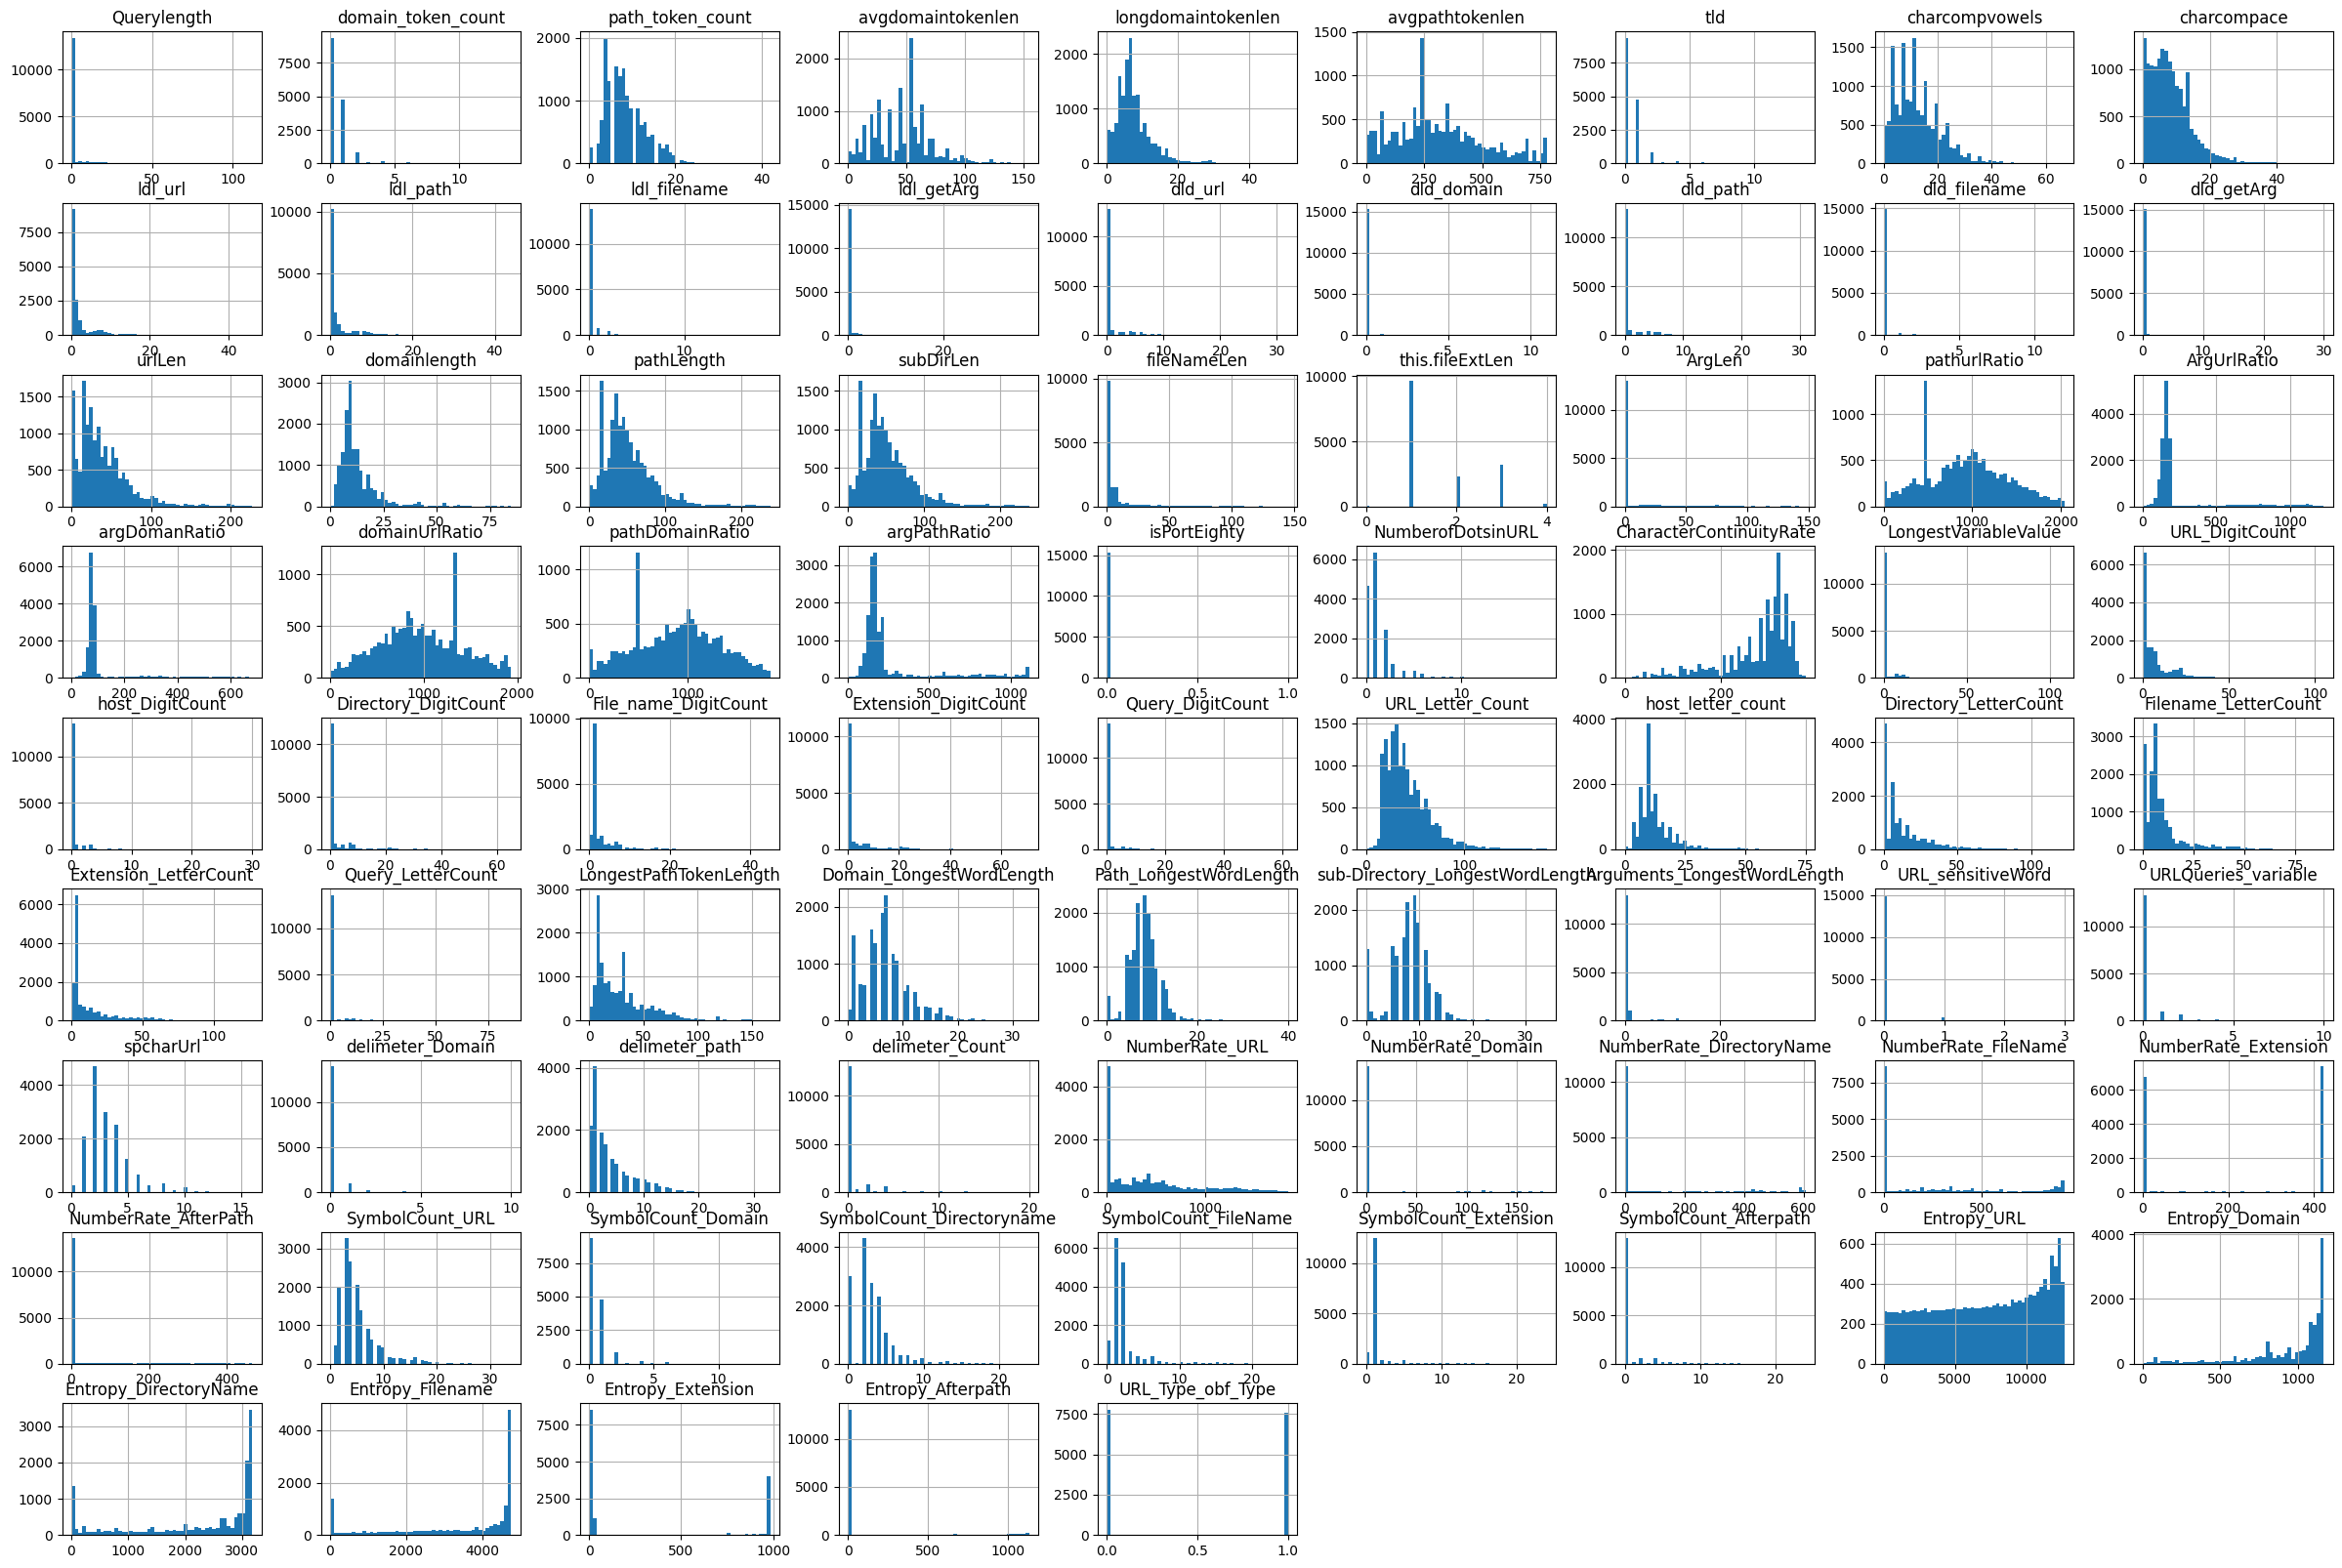

In [8]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (30,20))
plt.show()

# Correlation of the data

In [9]:
correlation=df.corr()
correlation

Querylength  domain_token_count  path_token_count  \
Querylength               1.000000           -0.063481          0.234574   
domain_token_count       -0.063481            1.000000         -0.270414   
path_token_count          0.234574           -0.270414          1.000000   
avgdomaintokenlen        -0.043416            0.053447         -0.255961   
longdomaintokenlen       -0.067065            0.317163         -0.293741   
...                            ...                 ...               ...   
Entropy_DirectoryName     0.043913           -0.012705         -0.319198   
Entropy_Filename         -0.114895            0.124783         -0.394685   
Entropy_Extension        -0.016082           -0.111209         -0.118864   
Entropy_Afterpath         0.352439           -0.094427          0.169601   
URL_Type_obf_Type        -0.065766            0.495312         -0.454181   

                       avgdomaintokenlen  longdomaintokenlen  avgpathtokenlen  \
Querylength                    -0.043416           -0.067065         0.037340   
domain_token_count              0.053447            0.317163         0.079354   
path_token_count               -0.255961           -0.293741        -0.173205   
avgdomaintokenlen               1.000000            0.887047         0.108265   
longdomaintokenlen              0.887047            1.000000         0.153512   
...                                  ...                 ...              ...   
Entropy_DirectoryName           0.028962           -0.002107        -0.112258   
Entropy_Filename                0.007659            0.030843        -0.186709   
Entropy_Extension              -0.030040           -0.083779        -0.239924   
Entropy_Afterpath              -0.135240           -0.153507        -0.181262   
URL_Type_obf_Type               0.286378            0.415452         0.086499   

                            tld  charcompvowels  charcompace   ldl_url  ...  \
Querylength           -0.063481        0.278098     0.384460  0.434302  ...   
domain_token_count     1.000000       -0.194231    -0.129430  0.151788  ...   
path_token_count      -0.270414        0.793478     0.684128  0.019554  ...   
avgdomaintokenlen      0.053447       -0.216402    -0.147098  0.090549  ...   
longdomaintokenlen     0.317163       -0.225257    -0.141619  0.140814  ...   
...                         ...             ...          ...       ...  ...   
Entropy_DirectoryName -0.012705       -0.270321    -0.267258 -0.024532  ...   
Entropy_Filename       0.124783       -0.384922    -0.363172 -0.122638  ...   
Entropy_Extension     -0.111209       -0.216721    -0.233158 -0.116202  ...   
Entropy_Afterpath     -0.094427        0.081264     0.077321  0.007288  ...   
URL_Type_obf_Type      0.495312       -0.364946    -0.226098  0.251548  ...   

                       SymbolCount_FileName  SymbolCount_Extension  \
Querylength                        0.624241               0.616856   
domain_token_count                -0.088291              -0.087283   
path_token_count                   0.211475               0.217613   
avgdomaintokenlen                 -0.078032              -0.066668   
longdomaintokenlen                -0.109144              -0.095082   
...                                     ...                    ...   
Entropy_DirectoryName              0.212704               0.165671   
Entropy_Filename                   0.057884              -0.027774   
Entropy_Extension                  0.212504               0.107704   
Entropy_Afterpath                  0.468516               0.347926   
URL_Type_obf_Type                 -0.075428              -0.112313   

                       SymbolCount_Afterpath  Entropy_URL  Entropy_Domain  \
Querylength                         0.677300    -0.126299        0.046519   
domain_token_count                 -0.076923    -0.003770       -0.515622   
path_token_count                    0.323497    -0.663022        0.197231   
avgdomaintokenlen                  -0.1

# Heatmap

In [10]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())
plt.show()

Plotting another heatmap to clearly view the data.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(30,15))
map1=sns.heatmap(correlation, annot=True, linewidth=1) #cmap='coolwarm')
map1

<Axes: >

In [12]:
print(df.columns)

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_path', 'ldl_filename',
       'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path', 'dld_filename',
       'dld_getArg', 'urlLen', 'domainlength', 'pathLength', 'subDirLen',
       'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'isPortEighty', 'NumberofDotsinURL',
       'CharacterContinuityRate', 'LongestVariableValue', 'URL_DigitCount',
       'host_DigitCount', 'Directory_DigitCount', 'File_name_DigitCount',
       'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count',
       'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
       'Domain_LongestWordLength', 'Path_LongestWordL

In [13]:
# Sepratating & assigning features and target columns to X & y
y = df['URL_Type_obf_Type']
X = df.drop('URL_Type_obf_Type',axis=1)
X.shape, y.shape

((15367, 76), (15367,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((12293, 76), (3074, 76))

In [15]:
#importing packages
from sklearn.metrics import accuracy_score

# Applying models

# Decision tree

In [16]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Decision tree with max depth 3, 5, 7, 10

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Lists to store accuracies
train_accuracies = []
test_accuracies = []
depths = [3, 5, 7, 10]

# Loop through each depth
for depth in depths:
    # Instantiate and train the model
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)

    # Predict for both train and test sets
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    # Calculate accuracies
    acc_train_tree = accuracy_score(y_train, y_train_pred)
    acc_test_tree = accuracy_score(y_test, y_test_pred)

    # Append the accuracies to the lists
    train_accuracies.append(acc_train_tree)
    test_accuracies.append(acc_test_tree)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o', color='purple')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o', color='green')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In the above plot we can see that the accuracy is increasing as we are going more deep into the decision tree.

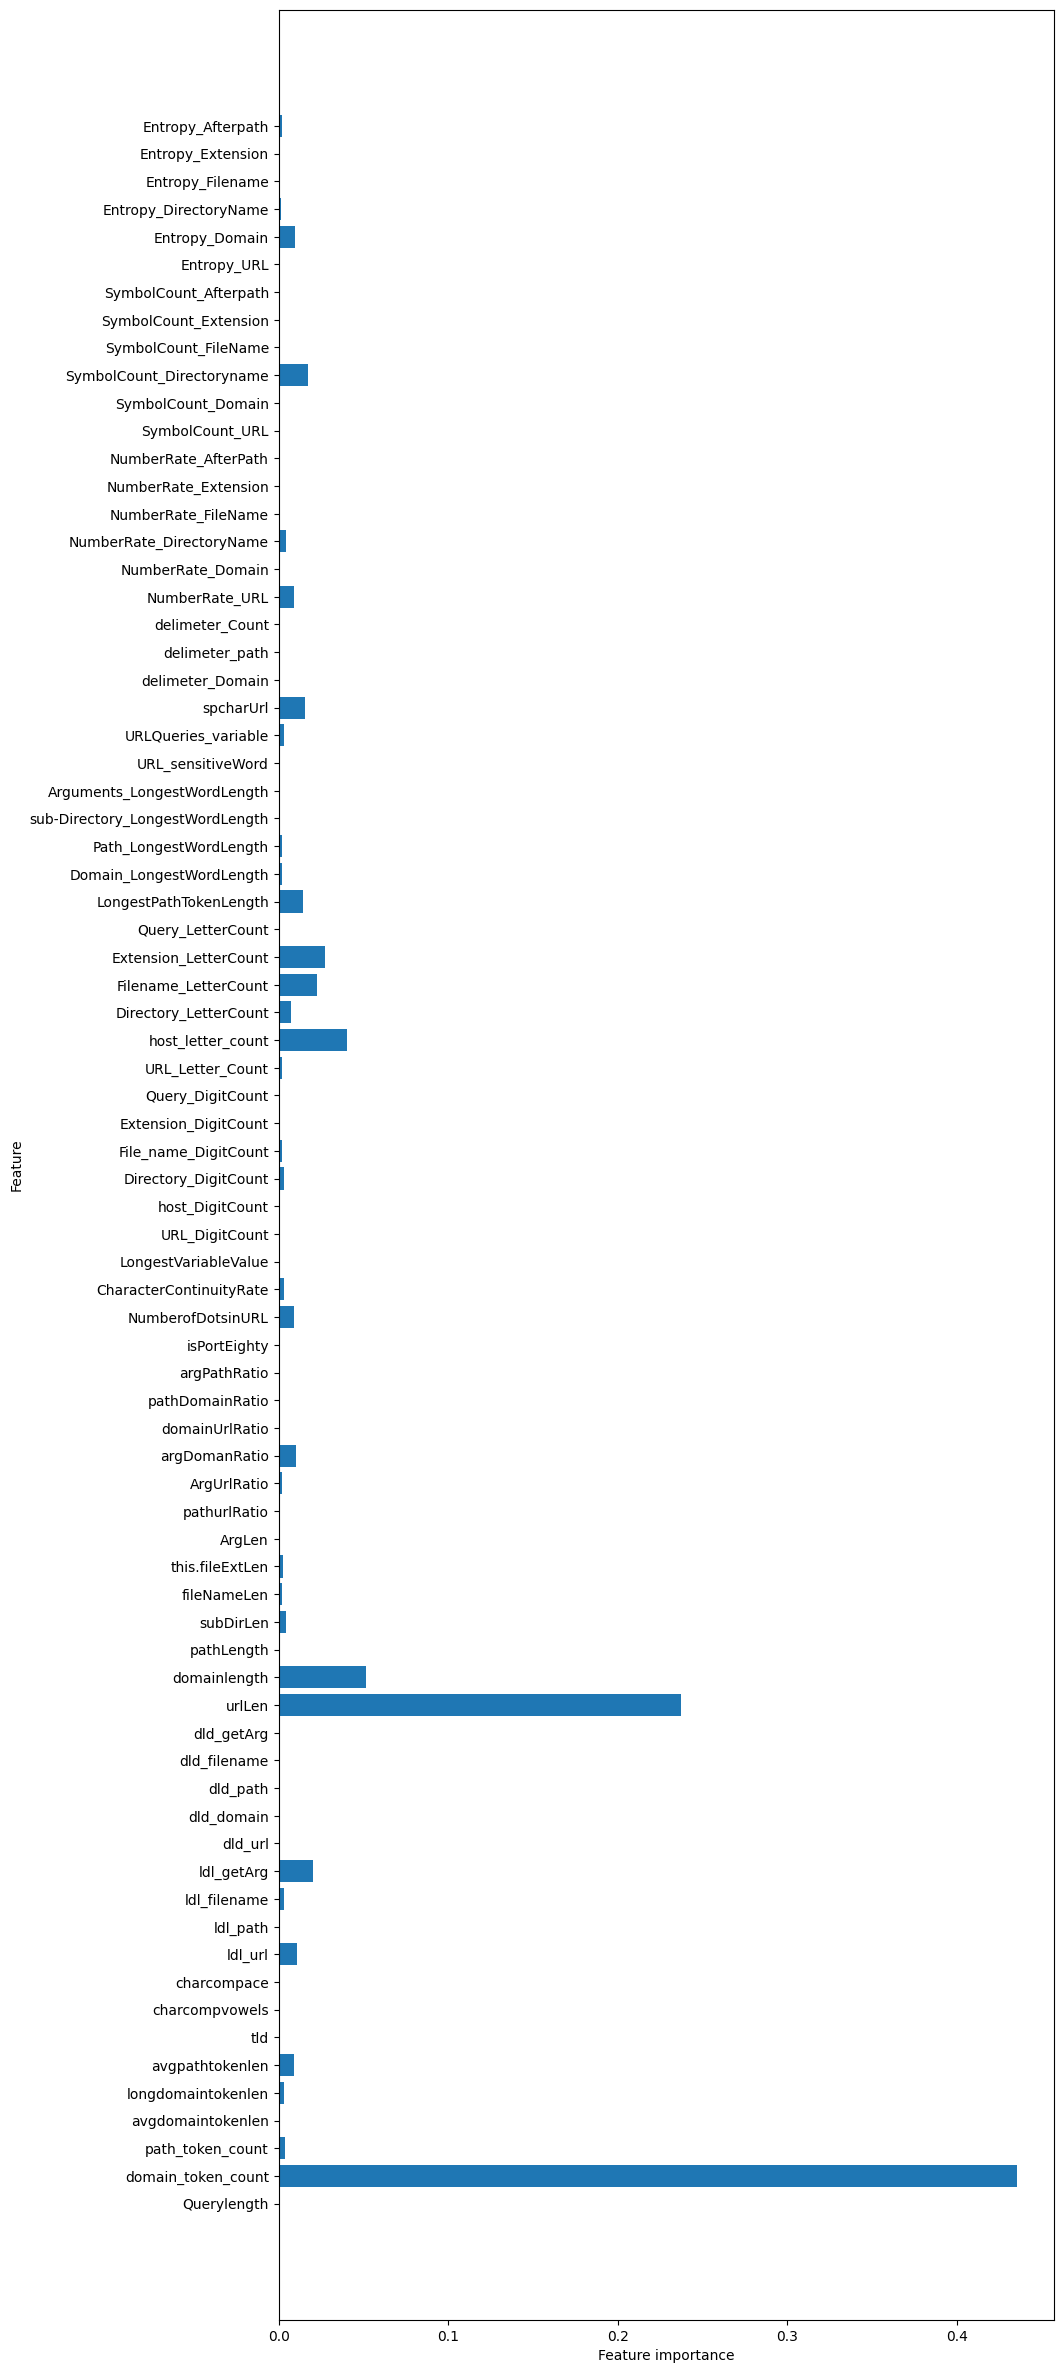

In [18]:
#checking the feature improtance in the model
plt.figure(figsize=(10,30))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [19]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Applying Decision tree removing features which are not useful.

In [20]:
ydt = df['URL_Type_obf_Type']
Xdt = df.drop(['URL_Type_obf_Type','Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen',
       'charcompvowels', 'charcompace', 'ldl_path', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'isPortEighty', 'NumberofDotsinURL',
       'CharacterContinuityRate', 'LongestVariableValue', 'URL_DigitCount',
       'host_DigitCount', 'Directory_DigitCount', 'File_name_DigitCount',
       'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 'Directory_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
       'Domain_LongestWordLength', 'Path_LongestWordLength',
       'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
       'URL_sensitiveWord',
       'delimeter_Domain', 'delimeter_path', 'delimeter_Count',
       'NumberRate_URL', 'NumberRate_Domain',
       'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath',
       'SymbolCount_URL', 'SymbolCount_Domain',
       'SymbolCount_FileName', 'SymbolCount_Extension',
       'SymbolCount_Afterpath', 'Entropy_URL',
       'Entropy_DirectoryName', 'Entropy_Filename', 'Entropy_Extension',
       'Entropy_Afterpath',],axis=1)
Xdt.shape, ydt.shape

((15367, 14), (15367,))

In [21]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(Xdt, ydt,
                                                    test_size = 0.2, random_state = 12)
Xdt_train.shape, Xdt_test.shape

((12293, 14), (3074, 14))

In [22]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
treedt = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(Xdt_train, ydt_train)

DecisionTreeClassifier(max_depth=10)

In [23]:
#predicting the target value from the model for the samples
ydt_test_tree = tree.predict(Xdt_test)
ydt_train_tree = tree.predict(Xdt_train)

In [24]:
#computing the accuracy of the model performance
dtacc_train_tree = accuracy_score(ydt_train,ydt_train_tree)
dtacc_test_tree = accuracy_score(ydt_test,ydt_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(dtacc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(dtacc_test_tree))

Decision Tree: Accuracy on training Data: 0.978
Decision Tree: Accuracy on test Data: 0.966


# The difference in accuracy when removing unimportant features and applying the models is minimal. The change in accuracy is only 0.01, which is negligible. Hence, we will retain all features.

# Random forest

In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [26]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


In [27]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.959
Random forest: Accuracy on test Data: 0.956


In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(10,30))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# XGBoost Classifier

In [30]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [32]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 0.987


In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# Support Vector Machine

In [34]:
from sklearn.svm import SVC # import the SVC class from sklearn.svm

# instantiate the model with adjusted parameters
svm = SVC(kernel='linear', max_iter=1000)  # limiting the number of iterations

# fit the model
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)

In [35]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [36]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.575
SVM : Accuracy on test Data: 0.569


In [37]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('SVM', acc_train_svm, acc_test_svm)

# Ensembelled model

We have used Decision tree, Random forest, XGBoost and SVM for ensembelled model.

In [38]:
!pip install scikit-learn

In [39]:
from sklearn.ensemble import VotingClassifier

# Assuming X and y are your features and target variable
X = df.drop(['URL_Type_obf_Type'], axis=1)
y = df['URL_Type_obf_Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the base models
model1 = tree
model2 = forest
model3 = xgb
model4 = svm

# Creating the Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', model1), ('rf', model2),('xb',model3),('sv',model4)],
    voting='hard')

# Training the ensemble model

ensemble_model.fit(X_train, y_train)

y_test_ensemble = ensemble_model.predict(X_test)
y_train_ensemble = ensemble_model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [40]:
#computing the accuracy of the model performance
acc_train_ensem = accuracy_score(y_train,y_train_ensemble)
acc_test_ensem = accuracy_score(y_test,y_test_ensemble)

print("Ensem: Accuracy on training Data: {:.3f}".format(acc_train_ensem))
print("Ensem : Accuracy on test Data: {:.3f}".format(acc_test_ensem))

Ensem: Accuracy on training Data: 0.979
Ensem : Accuracy on test Data: 0.971


In [41]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Ensem', acc_train_ensem, acc_test_ensem)

# LSTM(Long Short-Term Memory)

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [43]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Reshape for LSTM (assuming time_steps = 1 for simplicity)
time_steps = 1  # Example time step, adjust as needed
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))

In [45]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train_scaled.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
308/308 [==============================] - 9s 10ms/step - loss: 0.2077 - accuracy: 0.9300 - val_loss: 0.1238 - val_accuracy: 0.9516
Epoch 2/10
308/308 [==============================] - 2s 8ms/step - loss: 0.0985 - accuracy: 0.9642 - val_loss: 0.1073 - val_accuracy: 0.9569
Epoch 3/10
308/308 [==============================] - 3s 8ms/step - loss: 0.0832 - accuracy: 0.9712 - val_loss: 0.0950 - val_accuracy: 0.9634
Epoch 4/10
308/308 [==============================] - 3s 10ms/step - loss: 0.0744 - accuracy: 0.9743 - val_loss: 0.0971 - val_accuracy: 0.9642
Epoch 5/10
308/308 [==============================] - 3s 10ms/step - loss: 0.0668 - accuracy: 0.9778 - val_loss: 0.0855 - val_accuracy: 0.9658
Epoch 6/10
308/308 [==============================] - 2s 7ms/step - loss: 0.0604 - accuracy: 0.9779 - val_loss: 0.0847 - val_accuracy: 0.9691
Epoch 7/10
308/308 [==============================] - 2s 7ms/step - loss: 0.0569 - accuracy: 0.9809 - val_loss: 0.0771 - val_accuracy: 0.9719
Epo

In [47]:
# Predict and evaluate
y_pred_lstm = model.predict(X_test_scaled)
y_pred_lstm_classes = (y_pred_lstm > 0.5).astype(int)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm_classes)
print(f'LSTM Model Accuracy: {accuracy_lstm:.2f}')

97/97 [==============================] - 0s 2ms/step
LSTM Model Accuracy: 0.98


In [48]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

ML Model  Train Accuracy  Test Accuracy
0  Decision Tree           0.986          0.972
1  Random Forest           0.959          0.956
2        XGBoost           1.000          0.987
3            SVM           0.575          0.569
4          Ensem           0.979          0.971

The sum-up of the results is that XGBoost performs best with a perfect accuracy on training data and achieving 98.7% maximum test accuracy and 100% on traning data. The Decision Tree and Ensemble models also provided strong performances, posted test accuracies of 97.3% and 97.0%, respectively It seems that SVM did not perform well whereas Random Forest gives a strong result with 95.2% accuracy on test set, so it could be considered to apply this classifier as the model of this dataset since the decision trees are simple and easy to understand. Best balance of training and test accuracy; overall, XGBoost has outperformed other models.